In [ ]:
'''
Script for testing sensitivity map estimation function
'''

In [1]:
import numpy as np
import scipy as scp
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import time

# custom convenience functions
from utils.plotting import mid3views

# Set-up plots
plt.rcParams['figure.figsize'] = [12.8, 9.6] # make figures twice as large as default size
plt.rcParams['figure.dpi'] = 200 # make figures twice as high dpi

# Load some data
dataType = '3D'
fn_2d = '/mnt/storage/rexfung/greTestData/gre_2d.mat'
fn_3d = '/mnt/storage/rexfung/greTestData/gre_3d.mat'

if dataType == '2D':
    ksp = scp.io.loadmat(fn_2d)['ksp'] # coil, ky, kx
    Ncoils, Ny, Nx = ksp.shape # convenience vars

elif dataType == '3D':
    ksp = scp.io.loadmat(fn_3d)['ksp'] # coil, kz, ky, kx
    Ncoils, Nz, Ny, Nx = ksp.shape # convenience vars

/home/rexfung/github/sigpy-mri-tutorial/.venv/lib/python3.10/site-packages/sigpy/config.py:27: UserWarning: Importing cupy.cuda.cudnn failed. For more details, see the error stack below:
No module named 'cupyx.cudnn'
  warnings.warn(


In [2]:
from utils.smaps import compute_smaps

# Estimate sensitivity maps
fn_mps_3d = '/mnt/storage/rexfung/greTestData/gre_3d_mps.mat'

start = time.time()
mps = compute_smaps(ksp)
end = time.time()
print('Time elapsed:', end - start)

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:24<00:00,  1.30it/s]

Time elapsed: 124.88508987426758


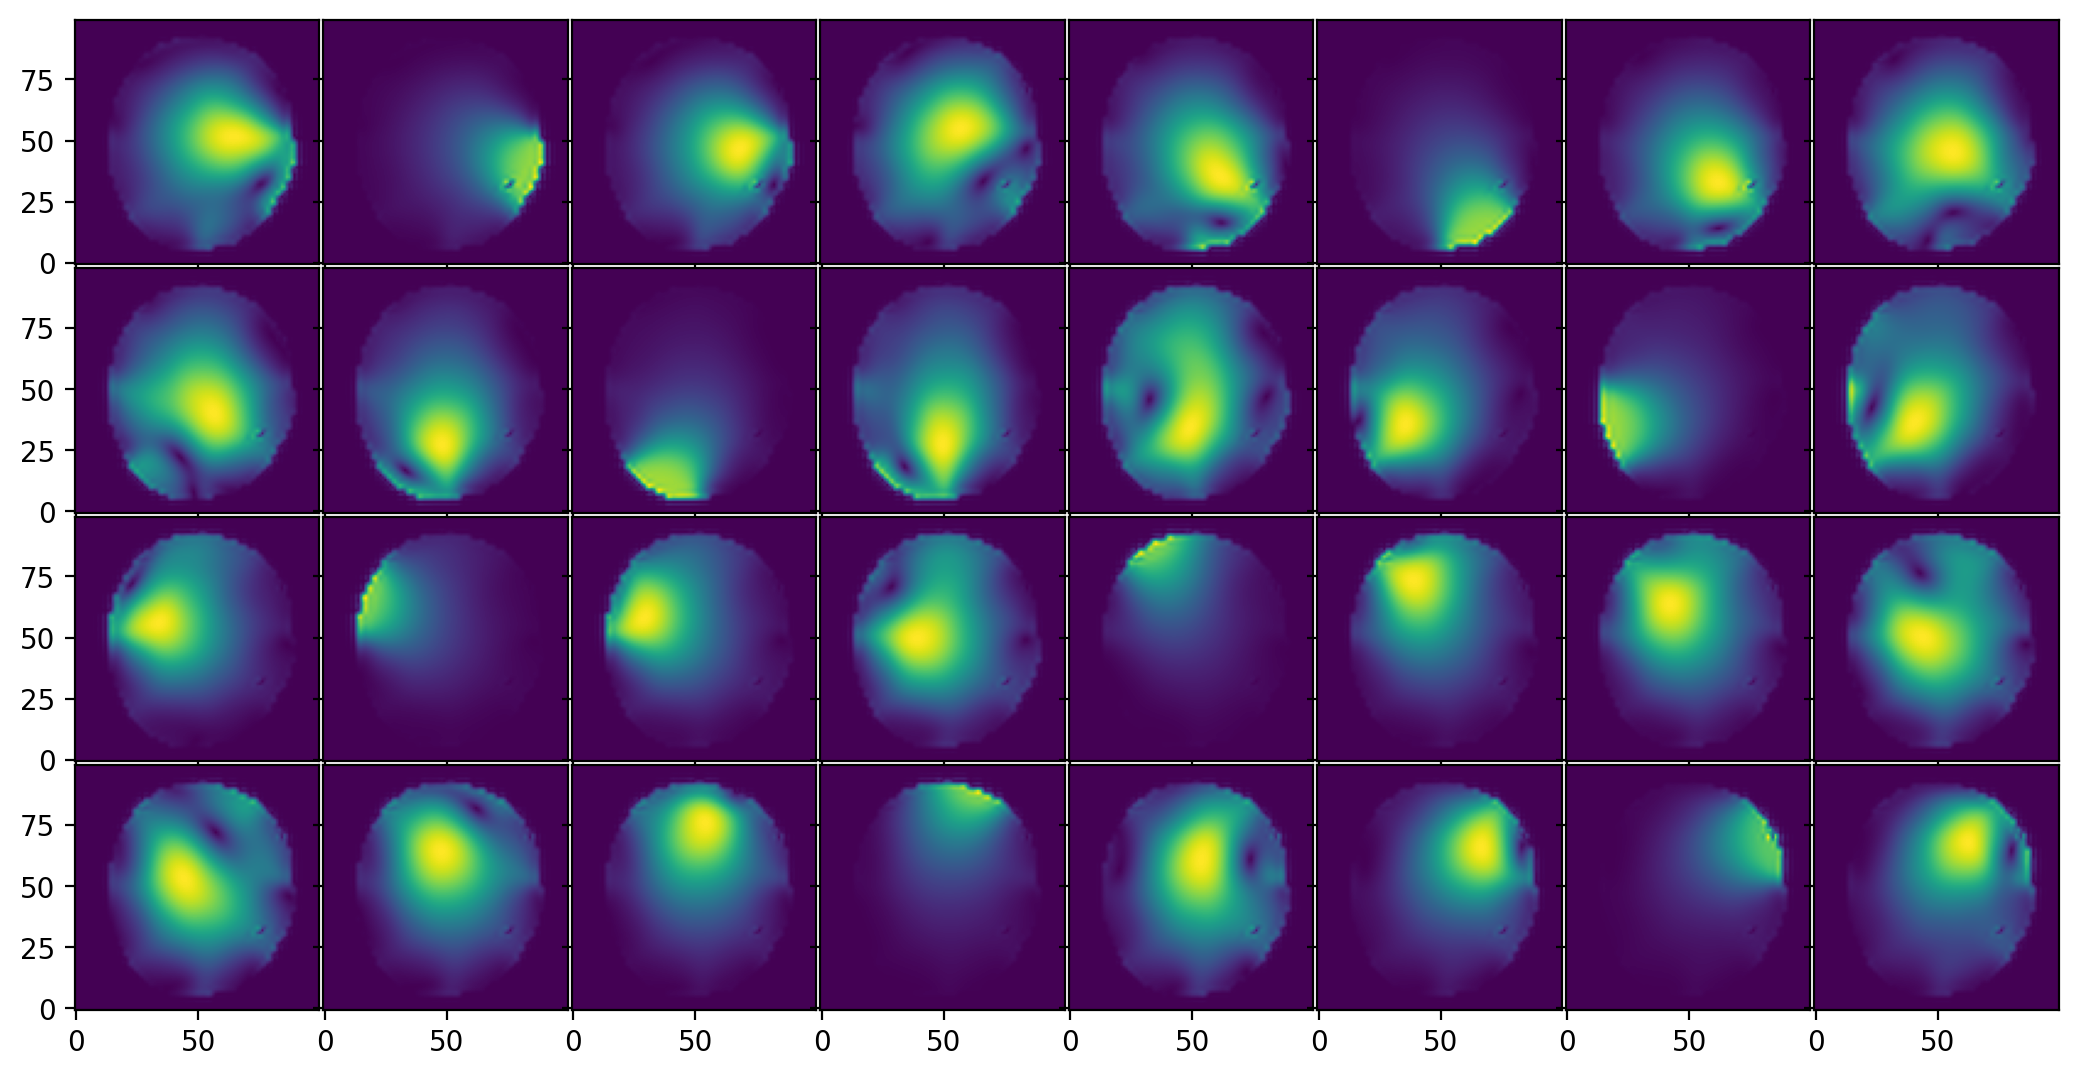

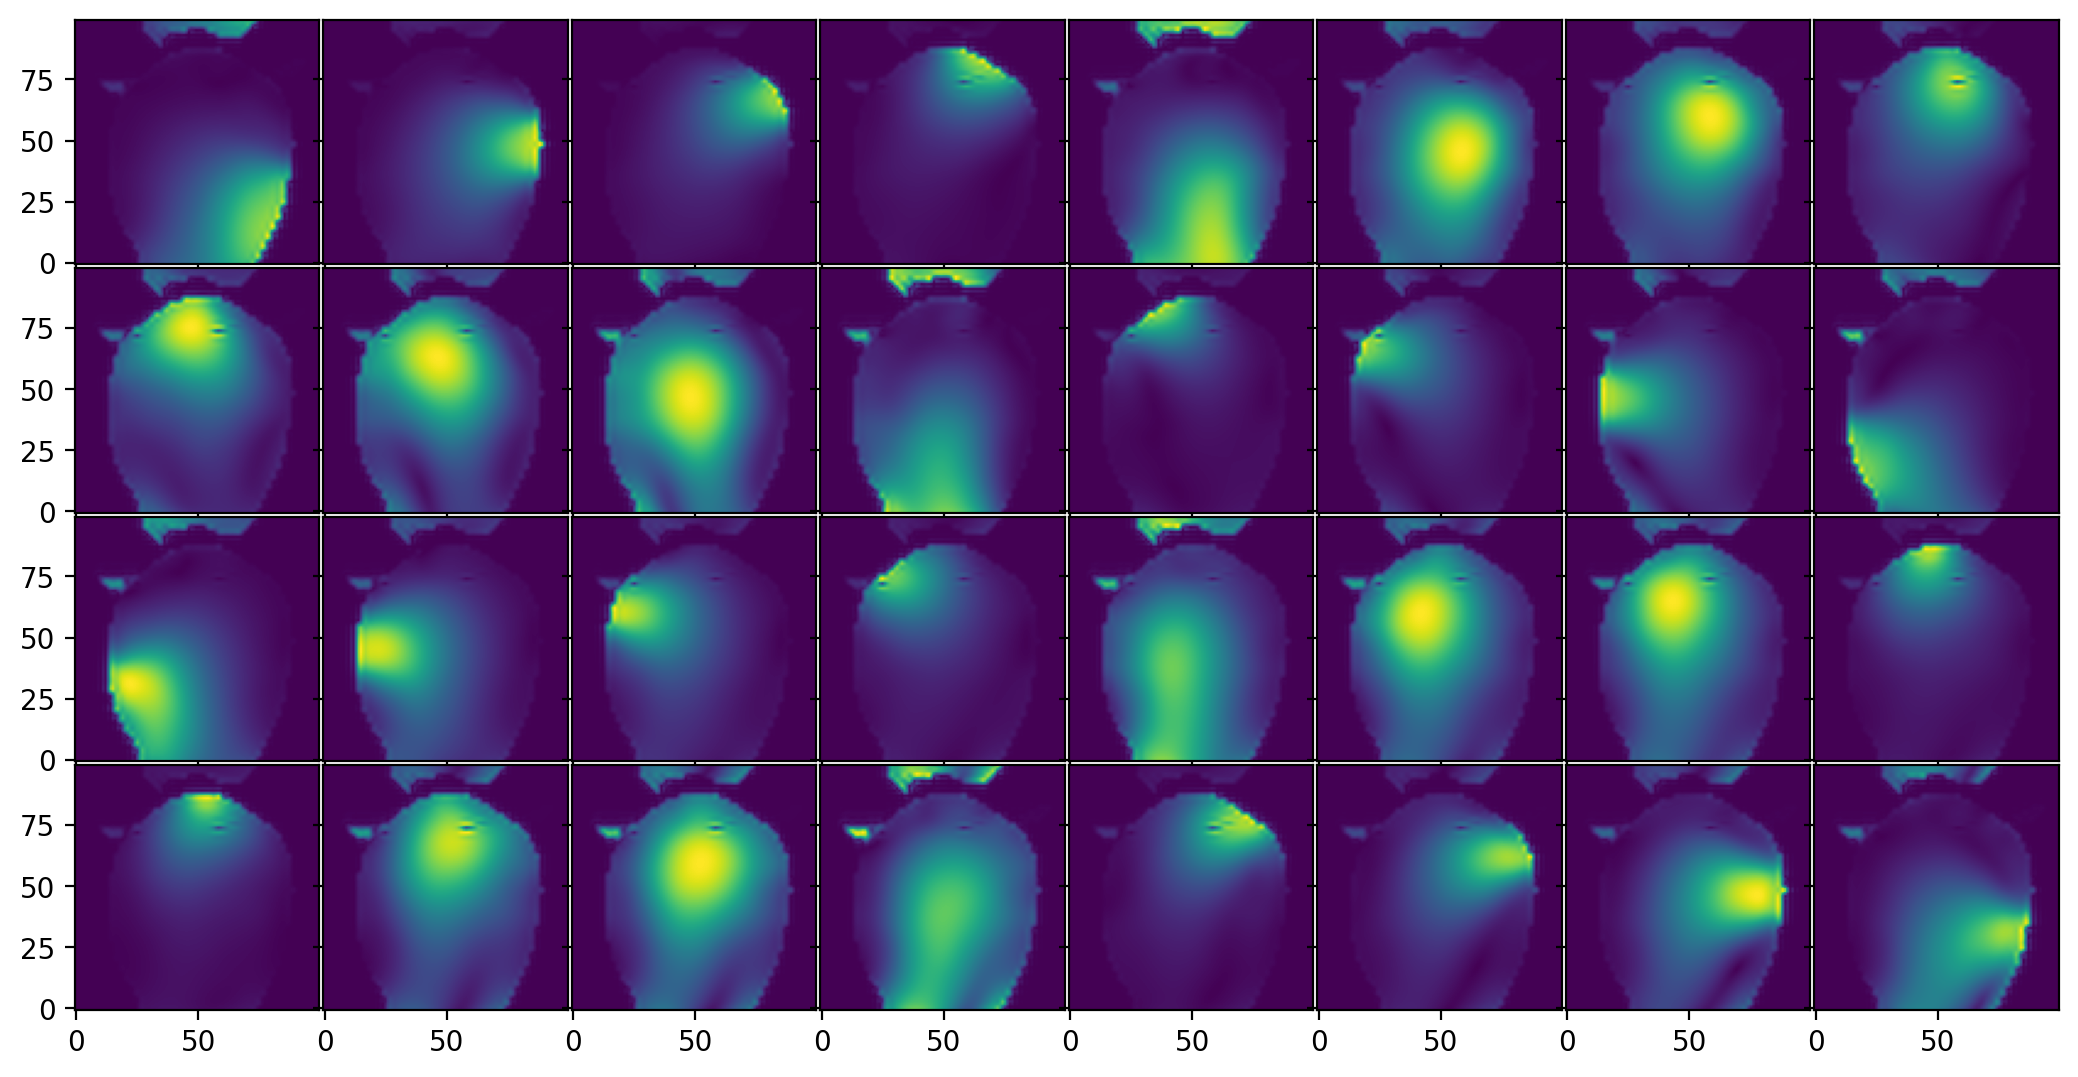

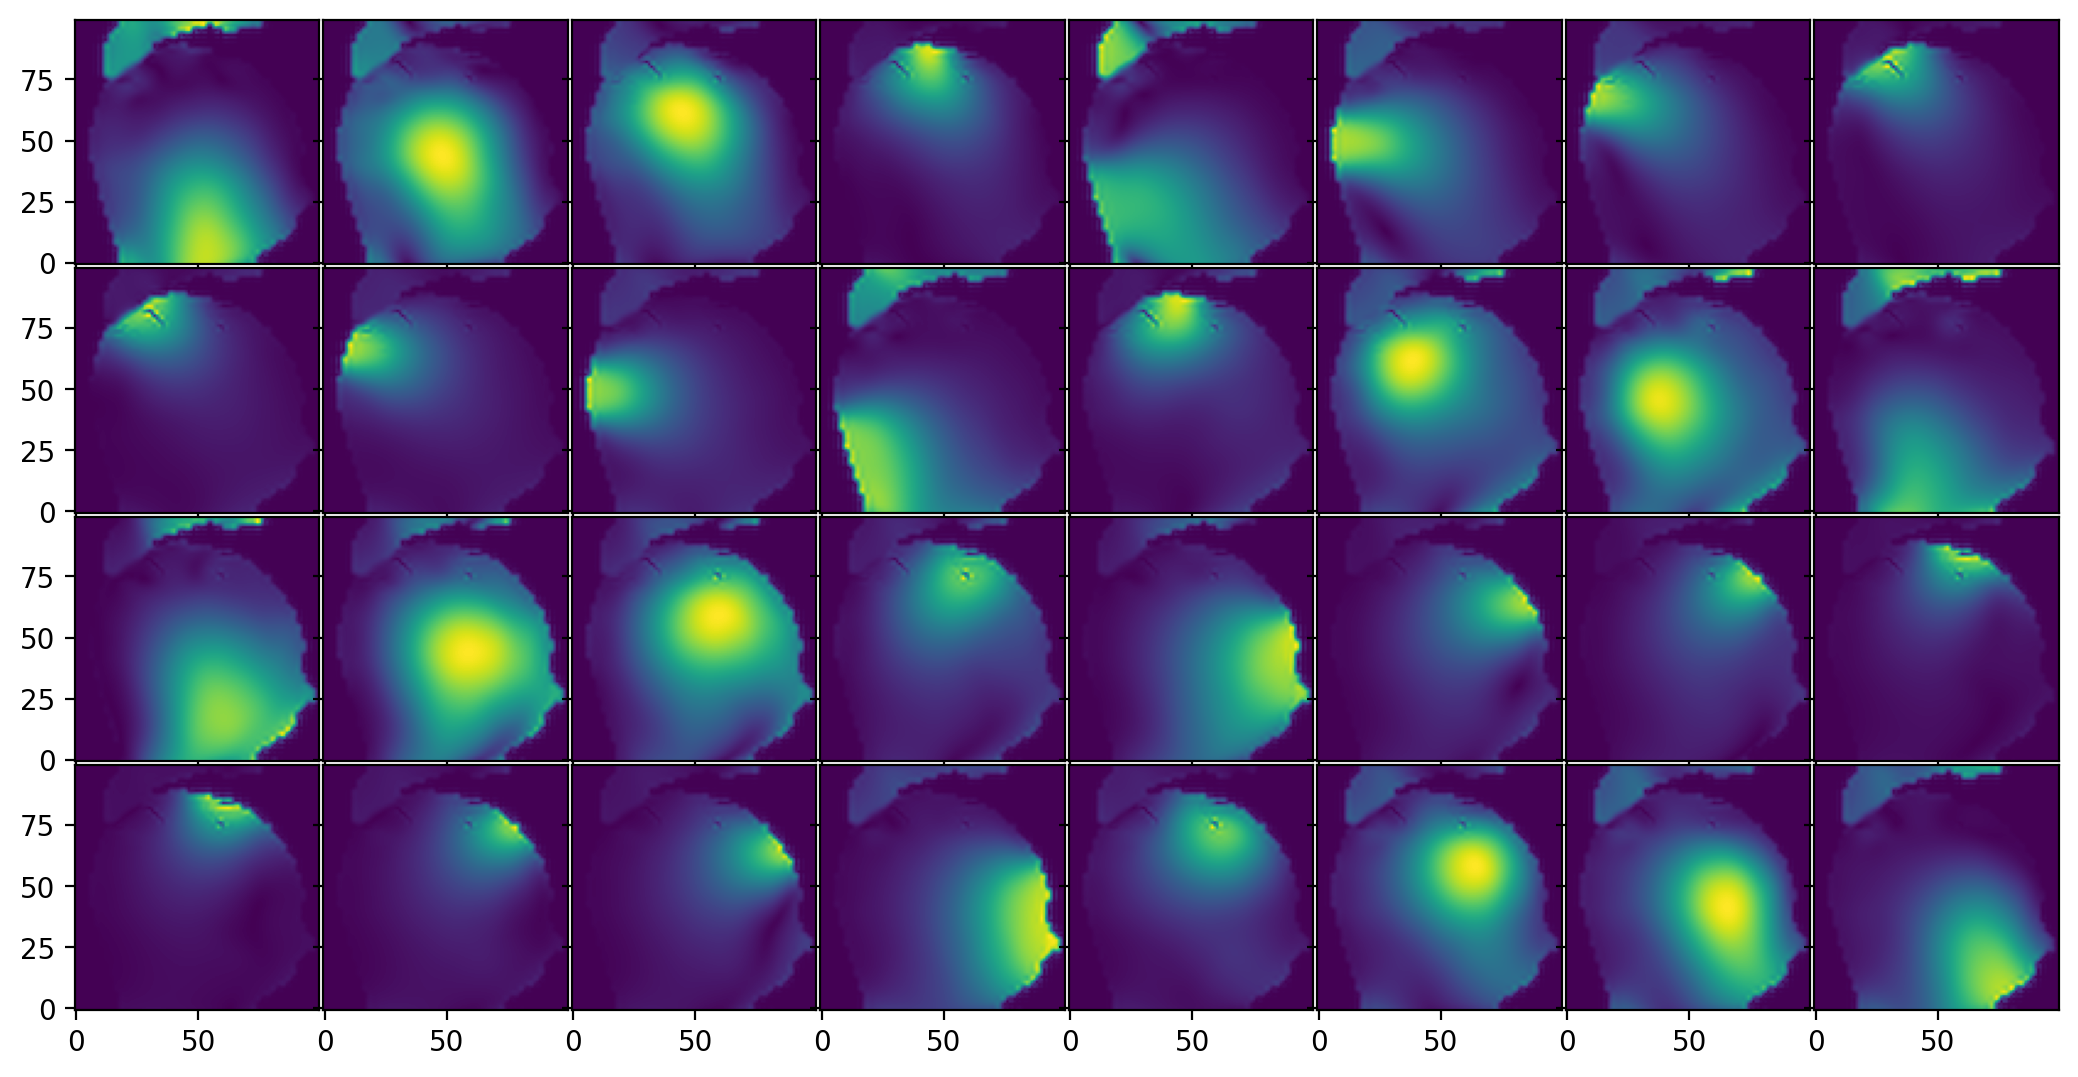

In [3]:
fig_ax = plt.figure()
grid_ax = ImageGrid(fig_ax,111,nrows_ncols=(4,8))
for coil in range(Ncoils):
    grid_ax[coil].imshow(np.abs(mps[coil,mps.shape[1]//2,:,:]),cmap='viridis',origin='lower')
plt.show()

fig_cor = plt.figure()
grid_cor = ImageGrid(fig_cor,111,nrows_ncols=(4,8))
for coil in range(Ncoils):
    grid_cor[coil].imshow(np.abs(mps[coil,:,mps.shape[2]//2,:]),cmap='viridis',origin='lower')
plt.show()

fig_sag = plt.figure()
grid_sag = ImageGrid(fig_sag,111,nrows_ncols=(4,8))
for coil in range(Ncoils):
    grid_sag[coil].imshow(np.abs(mps[coil,:,:,mps.shape[3]//2]),cmap='viridis',origin='lower')
plt.show()